In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from BlackScholesBarenblatt100D import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [4]:
model.load_model("models/BlackScholesBarenblattMLMC100DM1.pth")

In [5]:
graph = model.iteration, model.training_loss

In [14]:
n_iter = 5 * 10**2
lr = 1e-10

In [6]:
def figsize(scale, nplots = 1):
    fig_width_pt = 438.17227                        
    inches_per_pt = 1.0/72.27                       
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            
    fig_width = fig_width_pt*inches_per_pt*scale    
    fig_height = nplots*fig_width*golden_mean             
    fig_size = [fig_width,fig_height]
    return fig_size

In [7]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 10

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

In [17]:
samples = 10

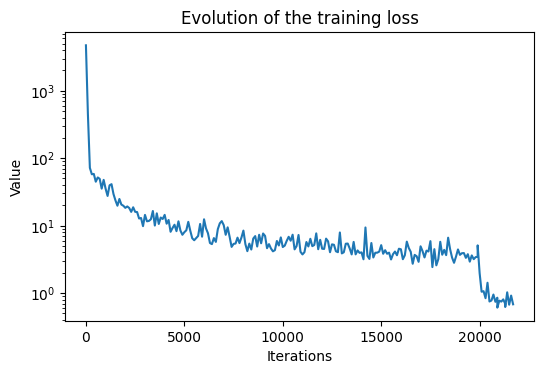

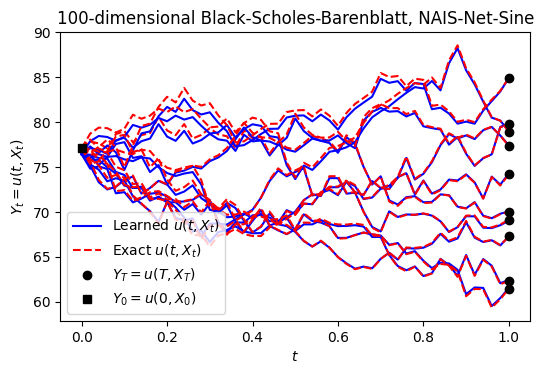

In [8]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM1Loss.pdf')

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM1Preds.pdf')
plt.show()

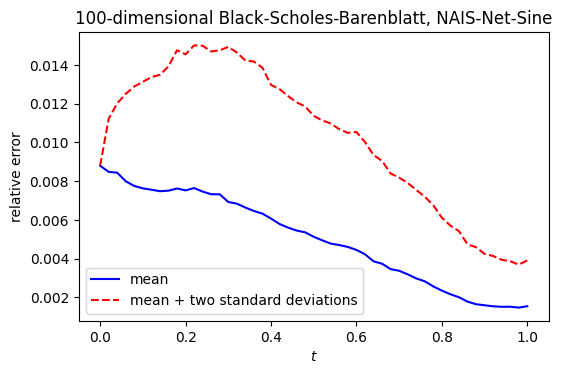

In [9]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM1Errors.pdf')
plt.show()

In [32]:
model.save_model("models/BlackScholesBarenblattMLMC100DM1.pth")

In [10]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [11]:
model.load_model("models/BlackScholesBarenblattMLMC100DM10.pth")

In [12]:
graph = model.iteration, model.training_loss

In [44]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 20900, Loss: 2.560e+00, Y0: 76.704, Time: 0.18, Learning Rate: 1.000e-08
It: 21000, Loss: 2.823e+00, Y0: 76.704, Time: 16.72, Learning Rate: 1.000e-08
It: 21100, Loss: 2.544e+00, Y0: 76.704, Time: 17.63, Learning Rate: 1.000e-08
It: 21200, Loss: 2.997e+00, Y0: 76.705, Time: 19.08, Learning Rate: 1.000e-08
It: 21300, Loss: 3.014e+00, Y0: 76.705, Time: 17.60, Learning Rate: 1.000e-08
It: 21400, Loss: 2.691e+00, Y0: 76.705, Time: 16.99, Learning Rate: 1.000e-08
It: 21500, Loss: 2.600e+00, Y0: 76.705, Time: 18.26, Learning Rate: 1.000e-08
It: 21600, Loss: 2.267e+00, Y0: 76.705, Time: 17.55, Learning Rate: 1.000e-08
It: 21700, Loss: 2.915e+00, Y0: 76.705, Time: 19.71, Learning Rate: 1.000e-08
It: 21800, Loss: 3.158e+00, Y0: 76.705, Time: 16.37, Learning Rate: 1.000e-08
It: 21900, Loss: 5.977e+00, Y0: 76.706, Time: 16.47, Learning Rate: 1.000e-08
total time: 192.718594789505 s


In [13]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 10

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

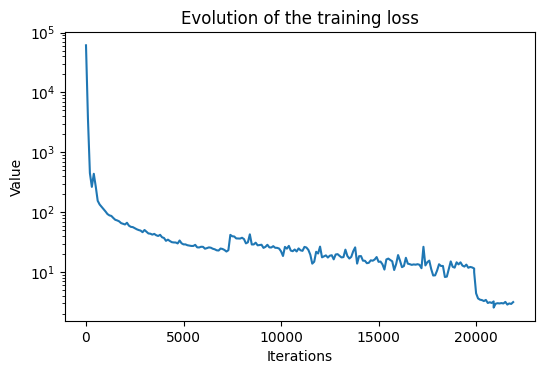

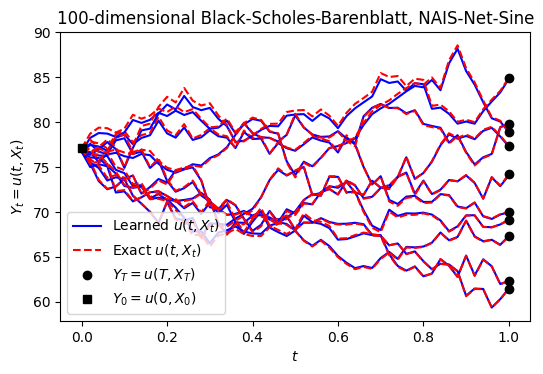

In [14]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM10Loss.pdf')

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM10Preds.pdf')

plt.show()

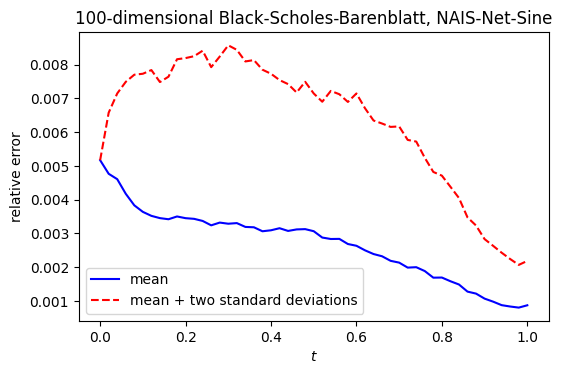

In [15]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM10Errors.pdf')
plt.show()

In [48]:
model.save_model("models/BlackScholesBarenblattMLMC100DM10.pth")

In [16]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [17]:
model.load_model("models/BlackScholesBarenblattMLMC100DM25.pth")

In [18]:
graph = model.iteration, model.training_loss

In [60]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 20900, Loss: 5.445e+00, Y0: 76.866, Time: 0.19, Learning Rate: 1.000e-08
It: 21000, Loss: 4.845e+00, Y0: 76.862, Time: 16.88, Learning Rate: 1.000e-08
It: 21100, Loss: 4.897e+00, Y0: 76.858, Time: 17.86, Learning Rate: 1.000e-08
It: 21200, Loss: 5.939e+00, Y0: 76.855, Time: 20.11, Learning Rate: 1.000e-08
It: 21300, Loss: 4.936e+00, Y0: 76.853, Time: 17.91, Learning Rate: 1.000e-08
It: 21400, Loss: 5.413e+00, Y0: 76.851, Time: 16.81, Learning Rate: 1.000e-08
It: 21500, Loss: 6.256e+00, Y0: 76.849, Time: 16.98, Learning Rate: 1.000e-08
It: 21600, Loss: 6.644e+00, Y0: 76.848, Time: 16.71, Learning Rate: 1.000e-08
It: 21700, Loss: 5.924e+00, Y0: 76.848, Time: 16.91, Learning Rate: 1.000e-08
It: 21800, Loss: 5.172e+00, Y0: 76.847, Time: 16.88, Learning Rate: 1.000e-08
It: 21900, Loss: 6.828e+00, Y0: 76.847, Time: 16.64, Learning Rate: 1.000e-08
total time: 191.52083015441895 s


In [19]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 10

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

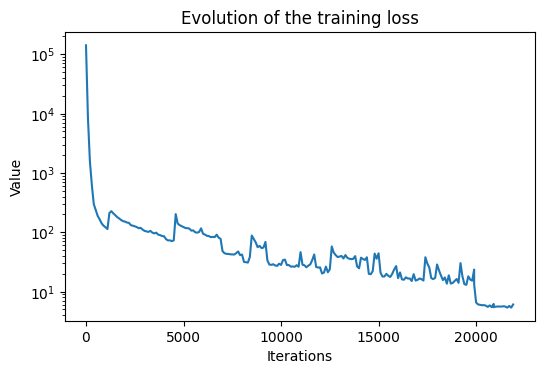

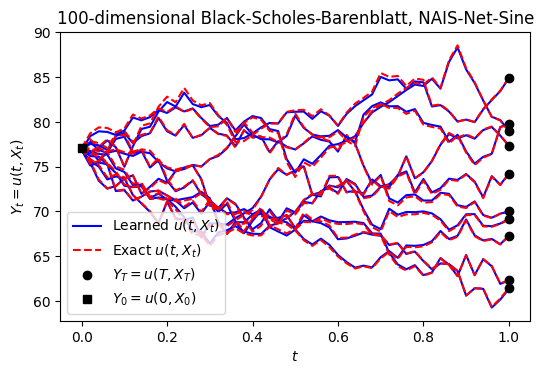

In [20]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM25Loss.pdf')


plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM25Preds.pdf')

plt.show()

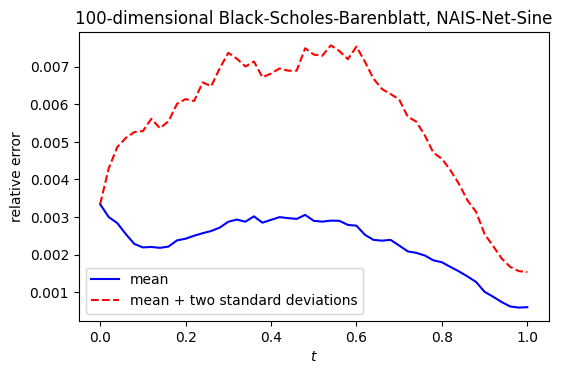

In [21]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM25Errors.pdf')

plt.show()

In [65]:
model.save_model("models/BlackScholesBarenblattMLMC100DM25.pth")

In [22]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [23]:
model.load_model("models/BlackScholesBarenblattMLMC100DM50.pth")

In [24]:
graph = model.iteration, model.training_loss

In [101]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 20900, Loss: 8.888e+00, Y0: 76.866, Time: 0.18, Learning Rate: 1.000e-08
It: 21000, Loss: 1.063e+01, Y0: 76.871, Time: 17.75, Learning Rate: 1.000e-08
It: 21100, Loss: 9.145e+00, Y0: 76.875, Time: 17.51, Learning Rate: 1.000e-08
It: 21200, Loss: 9.255e+00, Y0: 76.878, Time: 17.47, Learning Rate: 1.000e-08
It: 21300, Loss: 8.755e+00, Y0: 76.880, Time: 17.85, Learning Rate: 1.000e-08
It: 21400, Loss: 1.004e+01, Y0: 76.880, Time: 17.31, Learning Rate: 1.000e-08
It: 21500, Loss: 1.109e+01, Y0: 76.880, Time: 17.38, Learning Rate: 1.000e-08
It: 21600, Loss: 8.472e+00, Y0: 76.881, Time: 17.51, Learning Rate: 1.000e-08
It: 21700, Loss: 9.818e+00, Y0: 76.881, Time: 17.49, Learning Rate: 1.000e-08
It: 21800, Loss: 1.050e+01, Y0: 76.882, Time: 17.38, Learning Rate: 1.000e-08
It: 21900, Loss: 1.002e+01, Y0: 76.883, Time: 17.82, Learning Rate: 1.000e-08
total time: 192.9198877811432 s


In [25]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 10

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

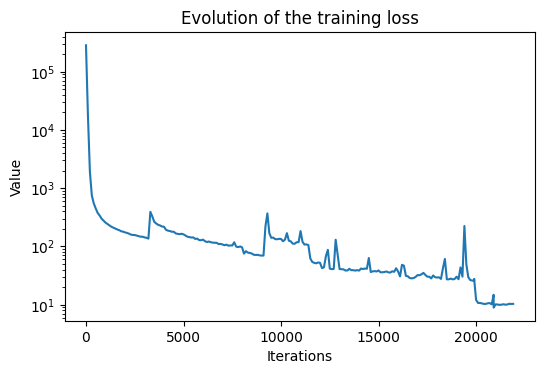

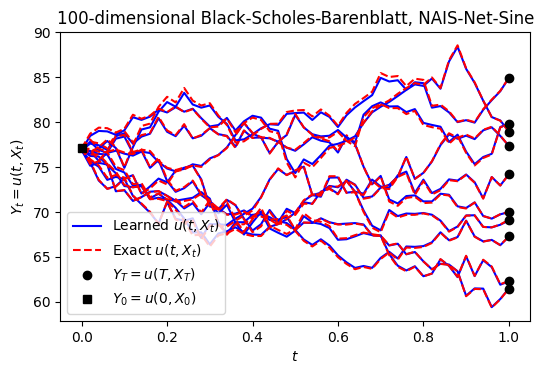

In [26]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM50Loss.pdf')

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM50Preds.pdf')

plt.show()

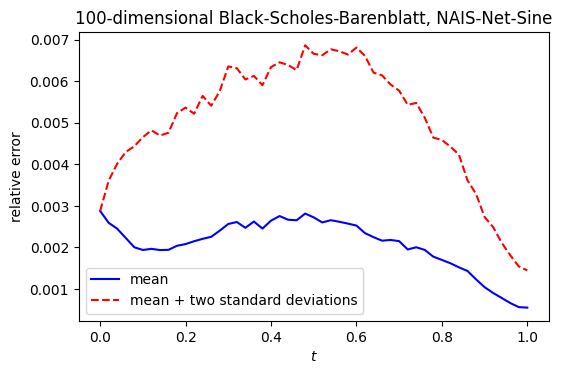

In [27]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM50Errors.pdf')

plt.show()

In [105]:
model.save_model("models/BlackScholesBarenblattMLMC100DM50.pth")

In [28]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [29]:
model.load_model("models/BlackScholesBarenblattMLMC100DM75.pth")

In [30]:
graph = model.iteration, model.training_loss

In [47]:
n_iter = 11 * 10**2
lr = 1e-8

In [48]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 20900, Loss: 1.257e+01, Y0: 76.913, Time: 0.19, Learning Rate: 1.000e-08
It: 21000, Loss: 1.344e+01, Y0: 76.918, Time: 17.80, Learning Rate: 1.000e-08
It: 21100, Loss: 1.176e+01, Y0: 76.923, Time: 17.81, Learning Rate: 1.000e-08
It: 21200, Loss: 1.349e+01, Y0: 76.926, Time: 18.03, Learning Rate: 1.000e-08
It: 21300, Loss: 1.444e+01, Y0: 76.927, Time: 17.83, Learning Rate: 1.000e-08
It: 21400, Loss: 1.384e+01, Y0: 76.929, Time: 18.02, Learning Rate: 1.000e-08
It: 21500, Loss: 1.307e+01, Y0: 76.931, Time: 17.94, Learning Rate: 1.000e-08
It: 21600, Loss: 1.329e+01, Y0: 76.932, Time: 18.23, Learning Rate: 1.000e-08
It: 21700, Loss: 1.446e+01, Y0: 76.933, Time: 18.35, Learning Rate: 1.000e-08
It: 21800, Loss: 1.376e+01, Y0: 76.933, Time: 18.03, Learning Rate: 1.000e-08
It: 21900, Loss: 1.513e+01, Y0: 76.933, Time: 17.99, Learning Rate: 1.000e-08
total time: 197.74478721618652 s


In [31]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 10

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

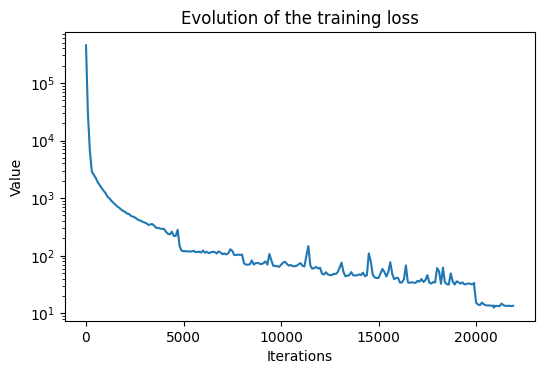

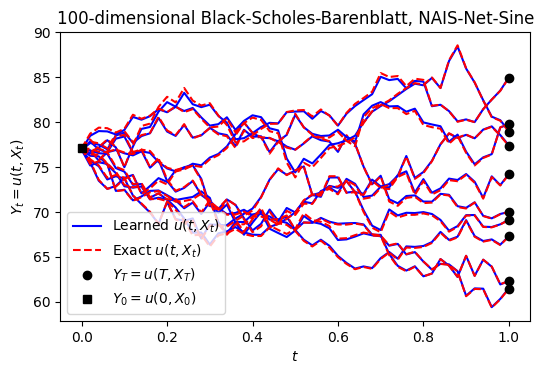

In [32]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM75Loss.pdf')

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM75Preds.pdf')

plt.show()

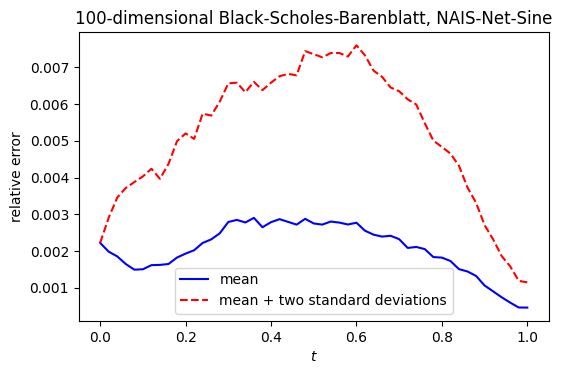

In [33]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM75Errors.pdf')

plt.show()

In [52]:
model.save_model("models/BlackScholesBarenblattMLMC100DM75.pth")

In [34]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [35]:
model.load_model("models/BlackScholesBarenblattMLMC100DM150.pth")

In [36]:
graph = model.iteration, model.training_loss

In [73]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 20900, Loss: 2.869e+01, Y0: 76.935, Time: 0.19, Learning Rate: 1.000e-08
It: 21000, Loss: 2.569e+01, Y0: 76.935, Time: 19.72, Learning Rate: 1.000e-08
It: 21100, Loss: 2.775e+01, Y0: 76.935, Time: 19.60, Learning Rate: 1.000e-08
It: 21200, Loss: 2.868e+01, Y0: 76.936, Time: 19.49, Learning Rate: 1.000e-08
It: 21300, Loss: 2.890e+01, Y0: 76.937, Time: 19.68, Learning Rate: 1.000e-08
It: 21400, Loss: 2.526e+01, Y0: 76.937, Time: 19.65, Learning Rate: 1.000e-08
It: 21500, Loss: 2.877e+01, Y0: 76.937, Time: 19.57, Learning Rate: 1.000e-08
It: 21600, Loss: 2.586e+01, Y0: 76.937, Time: 19.48, Learning Rate: 1.000e-08
It: 21700, Loss: 2.674e+01, Y0: 76.937, Time: 19.48, Learning Rate: 1.000e-08
It: 21800, Loss: 2.717e+01, Y0: 76.938, Time: 19.55, Learning Rate: 1.000e-08
It: 21900, Loss: 2.616e+01, Y0: 76.938, Time: 19.46, Learning Rate: 1.000e-08
total time: 215.36805844306946 s


In [37]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 10

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

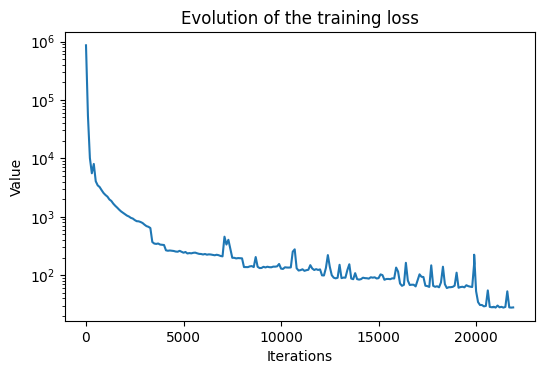

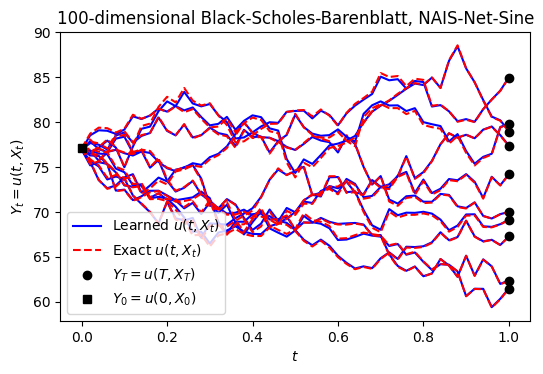

In [38]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM150Loss.pdf')

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM150Preds.pdf')

plt.show()

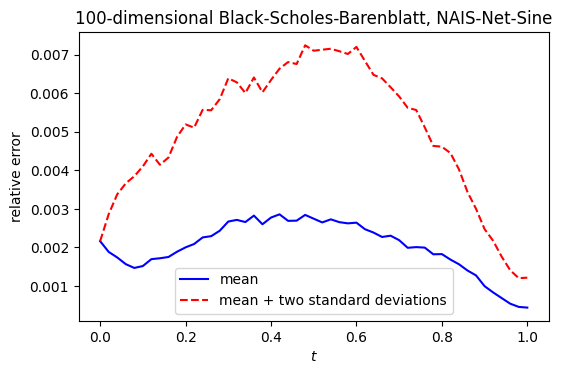

In [39]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM150Errors.pdf')
plt.show()

In [77]:
model.save_model("models/BlackScholesBarenblattMLMC100DM150.pth")

In [40]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [41]:
model.load_model("models/BlackScholesBarenblattMLMC100DM250.pth")

In [42]:
graph = model.iteration, model.training_loss

In [17]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 20900, Loss: 4.104e+01, Y0: 76.959, Time: 0.42, Learning Rate: 1.000e-08
It: 21000, Loss: 4.500e+01, Y0: 76.958, Time: 33.94, Learning Rate: 1.000e-08
It: 21100, Loss: 4.121e+01, Y0: 76.958, Time: 33.95, Learning Rate: 1.000e-08
It: 21200, Loss: 4.718e+01, Y0: 76.959, Time: 34.51, Learning Rate: 1.000e-08
It: 21300, Loss: 4.151e+01, Y0: 76.959, Time: 34.62, Learning Rate: 1.000e-08
It: 21400, Loss: 4.424e+01, Y0: 76.959, Time: 34.82, Learning Rate: 1.000e-08
It: 21500, Loss: 4.296e+01, Y0: 76.961, Time: 34.10, Learning Rate: 1.000e-08
It: 21600, Loss: 4.327e+01, Y0: 76.961, Time: 34.10, Learning Rate: 1.000e-08
It: 21700, Loss: 4.074e+01, Y0: 76.961, Time: 34.83, Learning Rate: 1.000e-08
It: 21800, Loss: 4.578e+01, Y0: 76.962, Time: 34.70, Learning Rate: 1.000e-08
It: 21900, Loss: 4.505e+01, Y0: 76.963, Time: 35.48, Learning Rate: 1.000e-08
total time: 379.1226782798767 s


In [43]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 10

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

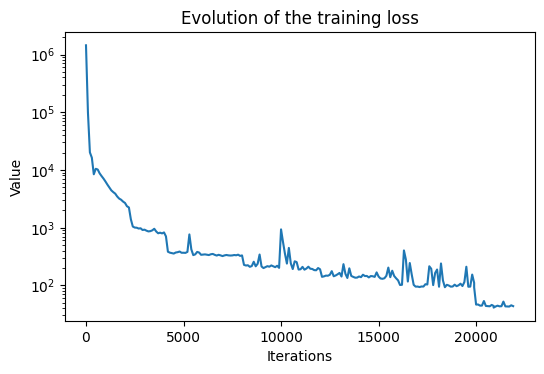

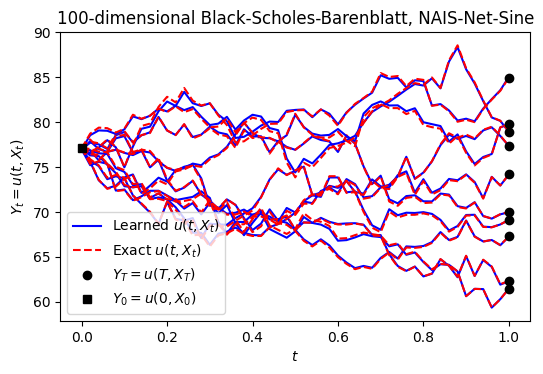

In [45]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM250Loss.pdf')

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM250Preds.pdf')

plt.show()

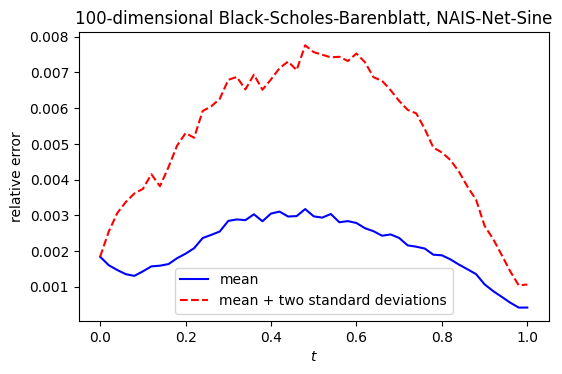

In [46]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM250Errors.pdf')

plt.show()

In [21]:
model.save_model("models/BlackScholesBarenblattMLMC100DM250.pth")

In [47]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 500  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [5]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 0, Loss: 2.960e+06, Y0: -0.856, Time: 0.44, Learning Rate: 1.000e-03
It: 100, Loss: 7.359e+04, Y0: 86.844, Time: 1.98, Learning Rate: 1.000e-03
It: 200, Loss: 1.433e+04, Y0: 78.161, Time: 1.94, Learning Rate: 1.000e-03
It: 300, Loss: 4.819e+03, Y0: 74.221, Time: 1.91, Learning Rate: 1.000e-03
It: 400, Loss: 5.320e+03, Y0: 73.153, Time: 1.93, Learning Rate: 1.000e-03
It: 500, Loss: 4.997e+03, Y0: 73.126, Time: 1.93, Learning Rate: 1.000e-03
It: 600, Loss: 2.484e+03, Y0: 74.484, Time: 1.99, Learning Rate: 1.000e-03
It: 700, Loss: 3.364e+03, Y0: 73.705, Time: 1.98, Learning Rate: 1.000e-03
It: 800, Loss: 3.769e+03, Y0: 73.581, Time: 2.01, Learning Rate: 1.000e-03
It: 900, Loss: 2.396e+03, Y0: 74.335, Time: 2.00, Learning Rate: 1.000e-03
It: 1000, Loss: 3.960e+03, Y0: 73.552, Time: 2.02, Learning Rate: 1.000e-03
It: 1100, Loss: 3.393e+03, Y0: 73.803, Time: 1.98, Learning Rate: 1.000e-03
It: 1200, Loss: 1.958e+03, Y0: 74.598, Time: 1.90, Learning Rate: 1.000e-03
It: 1300, Loss: 1

In [11]:
n_iter = 11 * 10**2
lr = 1e-5

In [12]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 19900, Loss: 2.012e+02, Y0: 76.990, Time: 0.28, Learning Rate: 1.000e-05
It: 20000, Loss: 9.805e+01, Y0: 76.909, Time: 25.79, Learning Rate: 1.000e-05
It: 20100, Loss: 9.661e+01, Y0: 76.917, Time: 26.00, Learning Rate: 1.000e-05
It: 20200, Loss: 1.007e+02, Y0: 76.930, Time: 26.02, Learning Rate: 1.000e-05
It: 20300, Loss: 9.455e+01, Y0: 76.952, Time: 25.77, Learning Rate: 1.000e-05
It: 20400, Loss: 9.100e+01, Y0: 76.947, Time: 25.63, Learning Rate: 1.000e-05
It: 20500, Loss: 9.679e+01, Y0: 76.952, Time: 25.11, Learning Rate: 1.000e-05
It: 20600, Loss: 8.702e+01, Y0: 76.958, Time: 25.42, Learning Rate: 1.000e-05
It: 20700, Loss: 9.021e+01, Y0: 76.955, Time: 25.26, Learning Rate: 1.000e-05
It: 20800, Loss: 9.227e+01, Y0: 76.978, Time: 25.07, Learning Rate: 1.000e-05
It: 20900, Loss: 9.601e+01, Y0: 76.967, Time: 25.14, Learning Rate: 1.000e-05
total time: 280.22958421707153 s


In [48]:
model.load_model("models/BlackScholesBarenblattMLMC100DM500.pth")

In [49]:
graph = model.iteration, model.training_loss

In [50]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 10

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

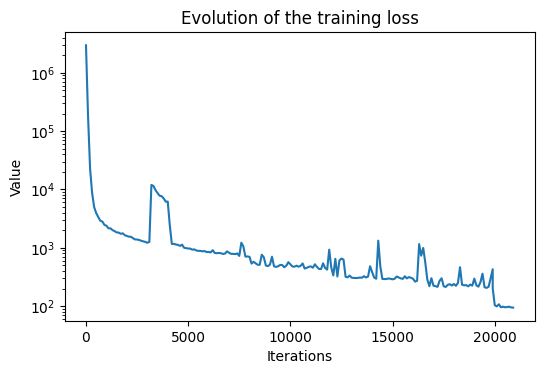

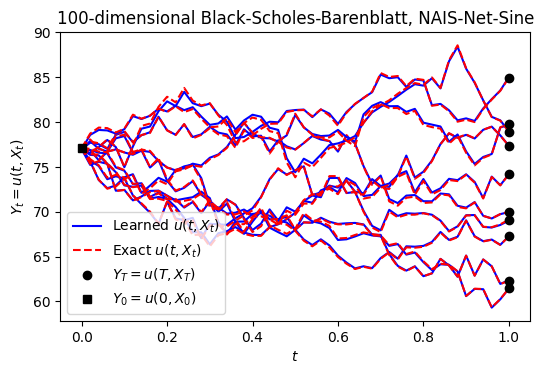

In [51]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM500Loss.pdf')

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM500Preds.pdf')

plt.show()

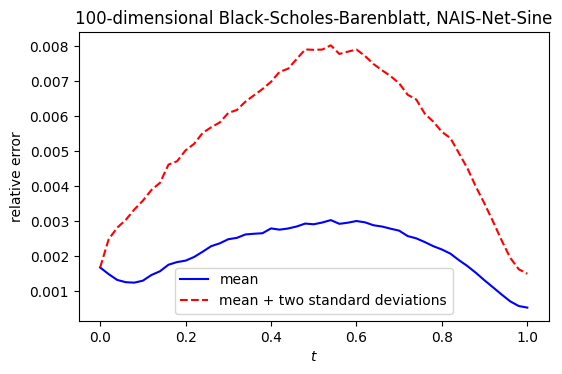

In [52]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig('Figures/BlackScholesBarenblattMLMC100DM500Errors.pdf')

plt.show()

In [16]:
model.save_model("models/BlackScholesBarenblattMLMC100DM500.pth")